<a href="https://colab.research.google.com/github/vedantsuryawanshi7/YBI-Foundation-Internship/blob/main/Mileage%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mileage Prediction - Regression Analysis

Source:

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

Attribute Information:

1. mpg: continuous

2. cylinders: multi-valued discrete

3. displacement: continuous

4. horsepower. continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance)

Import Library

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [297]:
df = pd.read_csv("/content/auto-mpg.csv")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Data Processing

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [299]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Remove Missings

In [300]:
df = df.dropna()

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [302]:

print(df['horsepower'].head())

df['horsepower'] = df['horsepower'].replace('?')

df['horsepower'] = df['horsepower'].astype(float)



0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object


Data Visualization

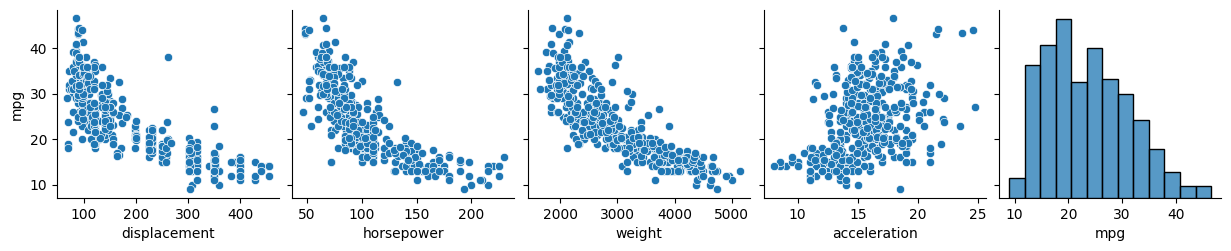

In [303]:
sns.pairplot(df, x_vars=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars=['mpg']);

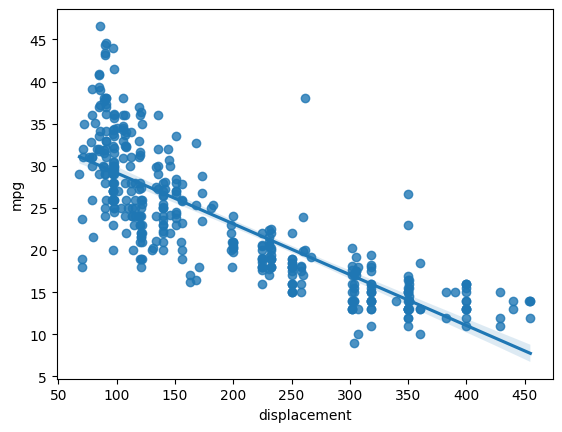

In [304]:
sns.regplot(x= 'displacement', y= 'mpg', data = df);

Defne Target Variable y and Feature X

In [305]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [306]:
y= df['mpg']

In [307]:
y.shape

(398,)

In [308]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [309]:
x.shape

(398, 4)

In [310]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


Scaling Data

In [311]:
from sklearn.preprocessing import StandardScaler

In [312]:
ss = StandardScaler()

In [313]:
x = ss.fit_transform(x)

In [314]:
x


array([[ 1.0906037 ,  0.67513301,  0.63086987, -1.29549834],
       [ 1.5035143 ,  1.59024469,  0.85433297, -1.47703779],
       [ 1.19623199,  1.19805397,  0.55047045, -1.65857724],
       ...,
       [-0.56103873, -0.52758521, -0.79858454, -1.4407299 ],
       [-0.70507731, -0.65831545, -0.40841088,  1.10082237],
       [-0.71467988, -0.5798773 , -0.29608816,  1.39128549]])

In [315]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-1.785283e-17,-1.071170e-16,-1.606755e-16,-2.677925e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.204411e+00,-1.521135e+00,-1.604943e+00,-2.747814e+00
25%,-8.563178e-01,-7.628996e-01,-8.828266e-01,-6.328794e-01
50%,-4.314040e-01,-3.053438e-01,-1.973624e-01,-2.472221e-02
75%,6.584879e-01,5.444028e-01,7.538337e-01,5.834349e-01
max,2.511784e+00,3.289738e+00,2.565185e+00,3.351912e+00


In [316]:
 from sklearn.model_selection import train_test_split

In [317]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state= 2529)

In [318]:
 x_train.shape, x_test.shape, y_train.shape, y_test.shape

((278, 4), (120, 4), (278,), (120,))

In [319]:
from sklearn.linear_model import LinearRegression

In [320]:
lr = LinearRegression()

In [321]:
lr.fit(x_train, y_train)

LinearRegression()

In [322]:
lr.intercept_

23.51265089052826

In [323]:
lr.coef_

array([-0.99494178, -1.62219057, -4.36708322, -0.31242781])

Predict Test Data

In [324]:
y_pred = lr.predict(x_test)

In [325]:
y_pred

array([15.6413223 , 30.70568921, 19.00500532, 24.26497422, 32.51193701,
       29.50872746, 25.34974301, 12.37794254,  9.22842256, 28.70411724,
       30.78182039, 20.83548701, 31.80486222, 14.83714853, 20.58492496,
       15.28586754, 24.57554262, 32.1407094 , 14.60042919, 11.25624461,
       18.49323322, 30.24098353, 27.0377935 , 18.98205777, 20.28270723,
       26.19405092, 32.20466642, 30.37889625,  9.0101315 , 25.45907299,
        7.86349137, 26.91617784, 31.05566643, 21.33748147, 15.92391943,
       21.3536772 ,  9.26066122, 23.36035517, 30.96079093, 33.56495272,
       25.87704226, 31.15312085, 27.57446344, 18.56942031, 22.32333438,
       25.19093033, 20.76442759, 29.67818098, 23.56368415, 24.45246595,
       27.73197482, 12.87521664, 22.92688824, 32.6501091 , 19.17044337,
       14.07286202, 30.98588152, 26.7547812 , 21.30562056, 30.11907286,
       23.62072524, 30.83931078, 23.27833324,  8.69988973, 31.48197925,
       19.79318075, 27.52347617, 21.60501817, 11.28476878, 28.30

Model Acurracy

In [326]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test, y_pred)
mean_absolute_percentage_error(y_test, y_pred)
r2_score(y_test, y_pred)

0.6681665781370159

Polynomial Regression

In [327]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures (degree=2, interaction_only=True, include_bias=False)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
lr.fit(x_train2, y_train)
LinearRegression()
lr.intercept_
lr.coef_
y_pred_poly = lr.predict(x_test2)

Model Accuracy

In [328]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test, y_pred_poly)
mean_absolute_percentage_error(y_test, y_pred_poly)
r2_score(y_test,y_pred_poly)

0.7056628748331311